In [1]:
import pandas as pd
import os
import seaborn as sns
from ast import literal_eval
from matplotlib import pyplot as plt

methoden = [
    "cqr_lin_quant_None",
    "cqr_lgbm_quant_None"
]

exp_path = "/mnt/e/Experiment_Apache_energy"
alpha = 0.1
df_cov_inter = pd.read_csv(os.path.join(exp_path, "cond_cov_interactions.csv"), sep=";")
df_select = df_cov_inter.loc[(df_cov_inter['Methode'].isin(methoden)) & (
        df_cov_inter['Strategie'] == "Random_3") & (df_cov_inter['Run'] == "run_2")]
df_select['Inter'] = df_select['Inter'].apply(literal_eval)
df_select = df_select.explode('Inter')
df_select = df_select.reset_index(drop=True)
df_select["cov_x_int"] = df_select["Inter"] / df_select["Cov"]
features = df_cov_inter.Feature.unique().tolist()
features

/tmp/ipykernel_97631/2755507724.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Inter'] = df_select['Inter'].apply(literal_eval)


['root',
 'prefork',
 'worker',
 'event',
 'threadlimit',
 'minthreadlimit',
 'maxthreadlimit',
 'minserverlimit',
 'maxserverlimit',
 'keepalive',
 'servercache',
 'sendfile',
 'status',
 'compression',
 'html5k',
 'html10k',
 'prefork_+_minserverlimit',
 'prefork_+_maxserverlimit',
 'prefork_+_keepalive',
 'prefork_+_servercache',
 'prefork_+_sendfile',
 'prefork_+_status',
 'prefork_+_compression',
 'prefork_+_html5k',
 'prefork_+_html10k',
 'worker_+_threadlimit',
 'worker_+_minthreadlimit',
 'worker_+_maxthreadlimit',
 'worker_+_minserverlimit',
 'worker_+_maxserverlimit',
 'worker_+_keepalive',
 'worker_+_servercache',
 'worker_+_sendfile',
 'worker_+_status',
 'worker_+_compression',
 'worker_+_html5k',
 'worker_+_html10k',
 'event_+_threadlimit',
 'event_+_minthreadlimit',
 'event_+_maxthreadlimit',
 'event_+_minserverlimit',
 'event_+_maxserverlimit',
 'event_+_keepalive',
 'event_+_servercache',
 'event_+_sendfile',
 'event_+_status',
 'event_+_compression',
 'event_+_html5k'

In [2]:
features_select = [x for x in features if "_+_" not in x]
df_select_plot = df_select.loc[df_select['Feature'].isin(features_select)]
df_select_plot

,Methode,Strategie,Run,Feature,Cov,Inter,cov_x_int
0,cqr_lin_quant_None,Random_3,run_2,root,0.800000,0.029667,0.037084
1,cqr_lin_quant_None,Random_3,run_2,root,0.800000,0.015222,0.019027
2,cqr_lin_quant_None,Random_3,run_2,root,0.800000,0.062884,0.078605
3,cqr_lin_quant_None,Random_3,run_2,root,0.800000,0.061601,0.077001
4,cqr_lin_quant_None,Random_3,run_2,root,0.800000,0.007849,0.009812
...,...,...,...,...,...,...,...
15820,cqr_lgbm_quant_None,Random_3,run_2,html10k,0.934211,0.217319,0.232623
15821,cqr_lgbm_quant_None,Random_3,run_2,html10k,0.934211,0.120735,0.129238
15822,cqr_lgbm_quant_None,Random_3,run_2,html10k,0.934211,0.26181,0.280247
15823,cqr_lgbm_quant_None,Random_3,run_2,html10k,0.934211,0.096086,0.102853


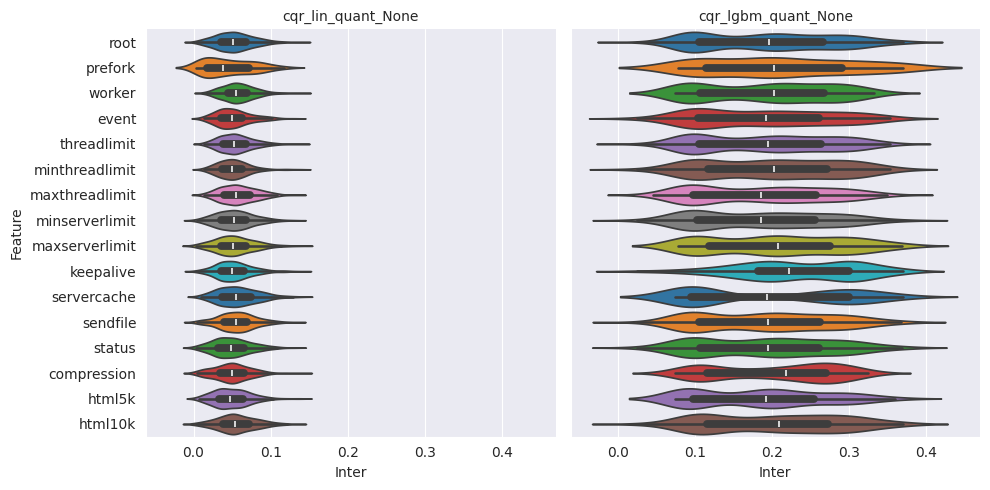

In [5]:
g = sns.FacetGrid(df_select_plot, col='Methode', height=5, aspect=1)
g.map_dataframe(sns.violinplot, x="Inter", y="Feature", hue='Feature', legend=False, fill=True, palette='tab10')
g.set_titles(col_template="{col_name}")